In [1]:
import networkx as nx
import numpy as np
import pandas

from graphing.sampling_graphs import create_sample_distribution_graph_groupings, create_grouping_influence_graph, \
    create_sample_distribution_graph
from util.network_util import generate_mutex_graph

create_sample_distribution_graph
from learning.grouped_learning import Berta
from learning.grouped_linear_regression import Gustav
from model.datasets import Datasets, SynDataset
from model.synth_data_factory import SyntheticDataBuilder
from sampling.group_sampling.hamming_group_sampling_strategy import HammingGroupSamplingStrategy
from sampling.random_sampling.better_random_sampling_strategy import BetterRandomSamplingStrategy
from sampling.sampler import Sampler
from testing.grouped_tester import GroupedTester
from testing.tester import Tester
from util.util import get_samples_with_results, get_regression_metricts, make_df_representation
from sampling.group_sampling.mutex_aware_group_sampling_strategy import MutexAwareGroupSamplingStrategy
from util.util import get_samples_with_results_full

pandas.set_option("display.max_columns", None)
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'seaborn'

# Data Generation

In [2]:
from util.network_util import generate_mutex_graph_squential

vm, test_strategy = Datasets().get_dataset('berkley')
g = generate_mutex_graph_squential(vm)

<Figure size 864x864 with 0 Axes>

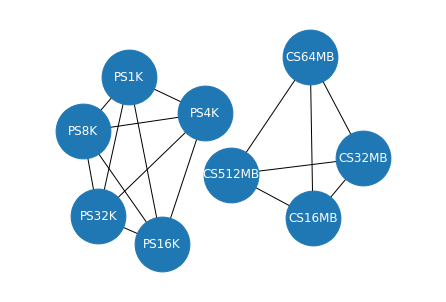

<Figure size 864x864 with 0 Axes>

In [3]:
from matplotlib import pyplot as plt

pos = nx.spring_layout(g, k=0.6, iterations=20)
nx.draw(g, pos, with_labels=True, node_size=3000, font_color='w')
ax = plt.gca()
ax.margins(0.20)
plt.figure(3,figsize=(12,12))

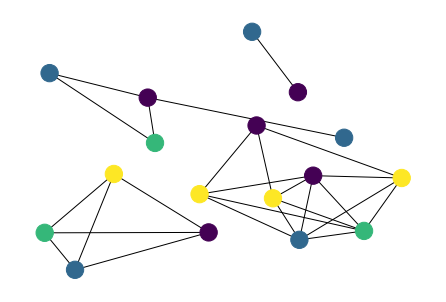

In [4]:
d = nx.coloring.greedy_color(g)
values = [d.get(node, 0.25) for node in g.nodes()]
nx.draw(g, pos, node_color=values)

In [7]:
cliques = [set(c) for c in nx.find_cliques(g)]
print(cliques)

[{'maxClients_1024', 'maxClients_4096', 'maxClients_2048', 'maxClients_512'}, {'compressionLevel_5', 'compressionLevel_1', 'compressionLevel_9', 'keepalive'}, {'compressionLevel_5', 'compressionLevel_1', 'compressionLevel_9', 'compressionLevel_0'}, {'compressionLevel_5', 'compressionLevel_1', 'compressionLevel_9', 'noCompression'}, {'prefork', 'moreProcesses', 'moreThreads'}, {'tlsAes128', 'tlsAes256'}, {'prefork', 'worker'}, {'keepalive', 'compression'}, {'compressionLevel_0', 'compression'}, {'noCompression', 'compression'}]
